In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Read in the data
df = pd.read_csv('./Data/small_box_office_flat_file.csv', header=0)

# ID isn't needed for analysis
df = df.drop('ID', axis=1)

# Seperate data to Xs and y (target)
X = df.drop(['Revenue'], axis=1)
y = df['Revenue']

## Data Preprocessing

Let's convert Dtypes of each column to the right Dtype:

In [3]:
class DtypeTransformer:
    """Converts the columns in col_names to the specified dtype"""
    def __init__(self, df):
        self.df = df

    def transform(self, col_names, dtype):
        self.df[col_names] = self.df[col_names].astype(dtype)
        return self.df
    
    def transform_to_bull(self):
        
        #  Find all numeric columns
        column_names = df.select_dtypes(include=[np.number]).columns 

        # re-extracting the columns of numerical type (using awesome np.number1 :)) then getting the max of those and storing them in a temporary variable m.
        m = df[df.select_dtypes(include=[np.number]).columns].max().reset_index(name='max')
        n = m.loc[m['max']==1, 'max']

        # Extracted the indexes of the rows from n and stored them in temporary variable p.
        # These indexes are the same as the indexes from original dataframe 'df'.
        p = column_names[n.index]
        
        return self.transform(p, 'bool')

# We can use the DtypeTransformer to convert the columns to the correct dtypes
transformer = DtypeTransformer(df)

# Set boolean values to 'bool' dtype
df = transformer.transform_to_bull()

# Convert Categorial colums to 'category' dtype
cat_column_names = ['OriginLang', 'CatRuntime', 'Genre']
df = transformer.transform(cat_column_names, 'category')

# Convert 'ReleaseDate' to datetime
df = transformer.transform('ReleaseDate', 'datetime64[ns]')



# Creating list of columns name by data type
bool_columns = list(X.select_dtypes(include=['bool']).columns)
cat_columns = list(X.select_dtypes(include=['category']).columns)
num_columns = list(X.select_dtypes(include=['int64', 'float64']).columns)

### Explore nullity in df

We would like to print only columns have null values in df

In [4]:
nullseries = df.isnull().sum()
print(nullseries[nullseries>0])

Actor0PrevRevenue            299
Actor1PrevRevenue            391
Actor2PrevRevenue            414
NumOfMoviesByProducer         56
NumOfWorkersArt                5
NumOfWorkersCamera             5
NumOfWorkersCrew               5
NumOfWorkersMkup               5
NumOfWorkersDirecting          5
NumOfWorkersEditing            5
NumOfWorkersLiting             5
NumOfWorkersWriting            5
NumOfWorkersProd               5
NumOfWorkersSound              5
NumOfWorkersVisualEffects      5
dtype: int64


## Visualize correlation with a diagonal correlation plot

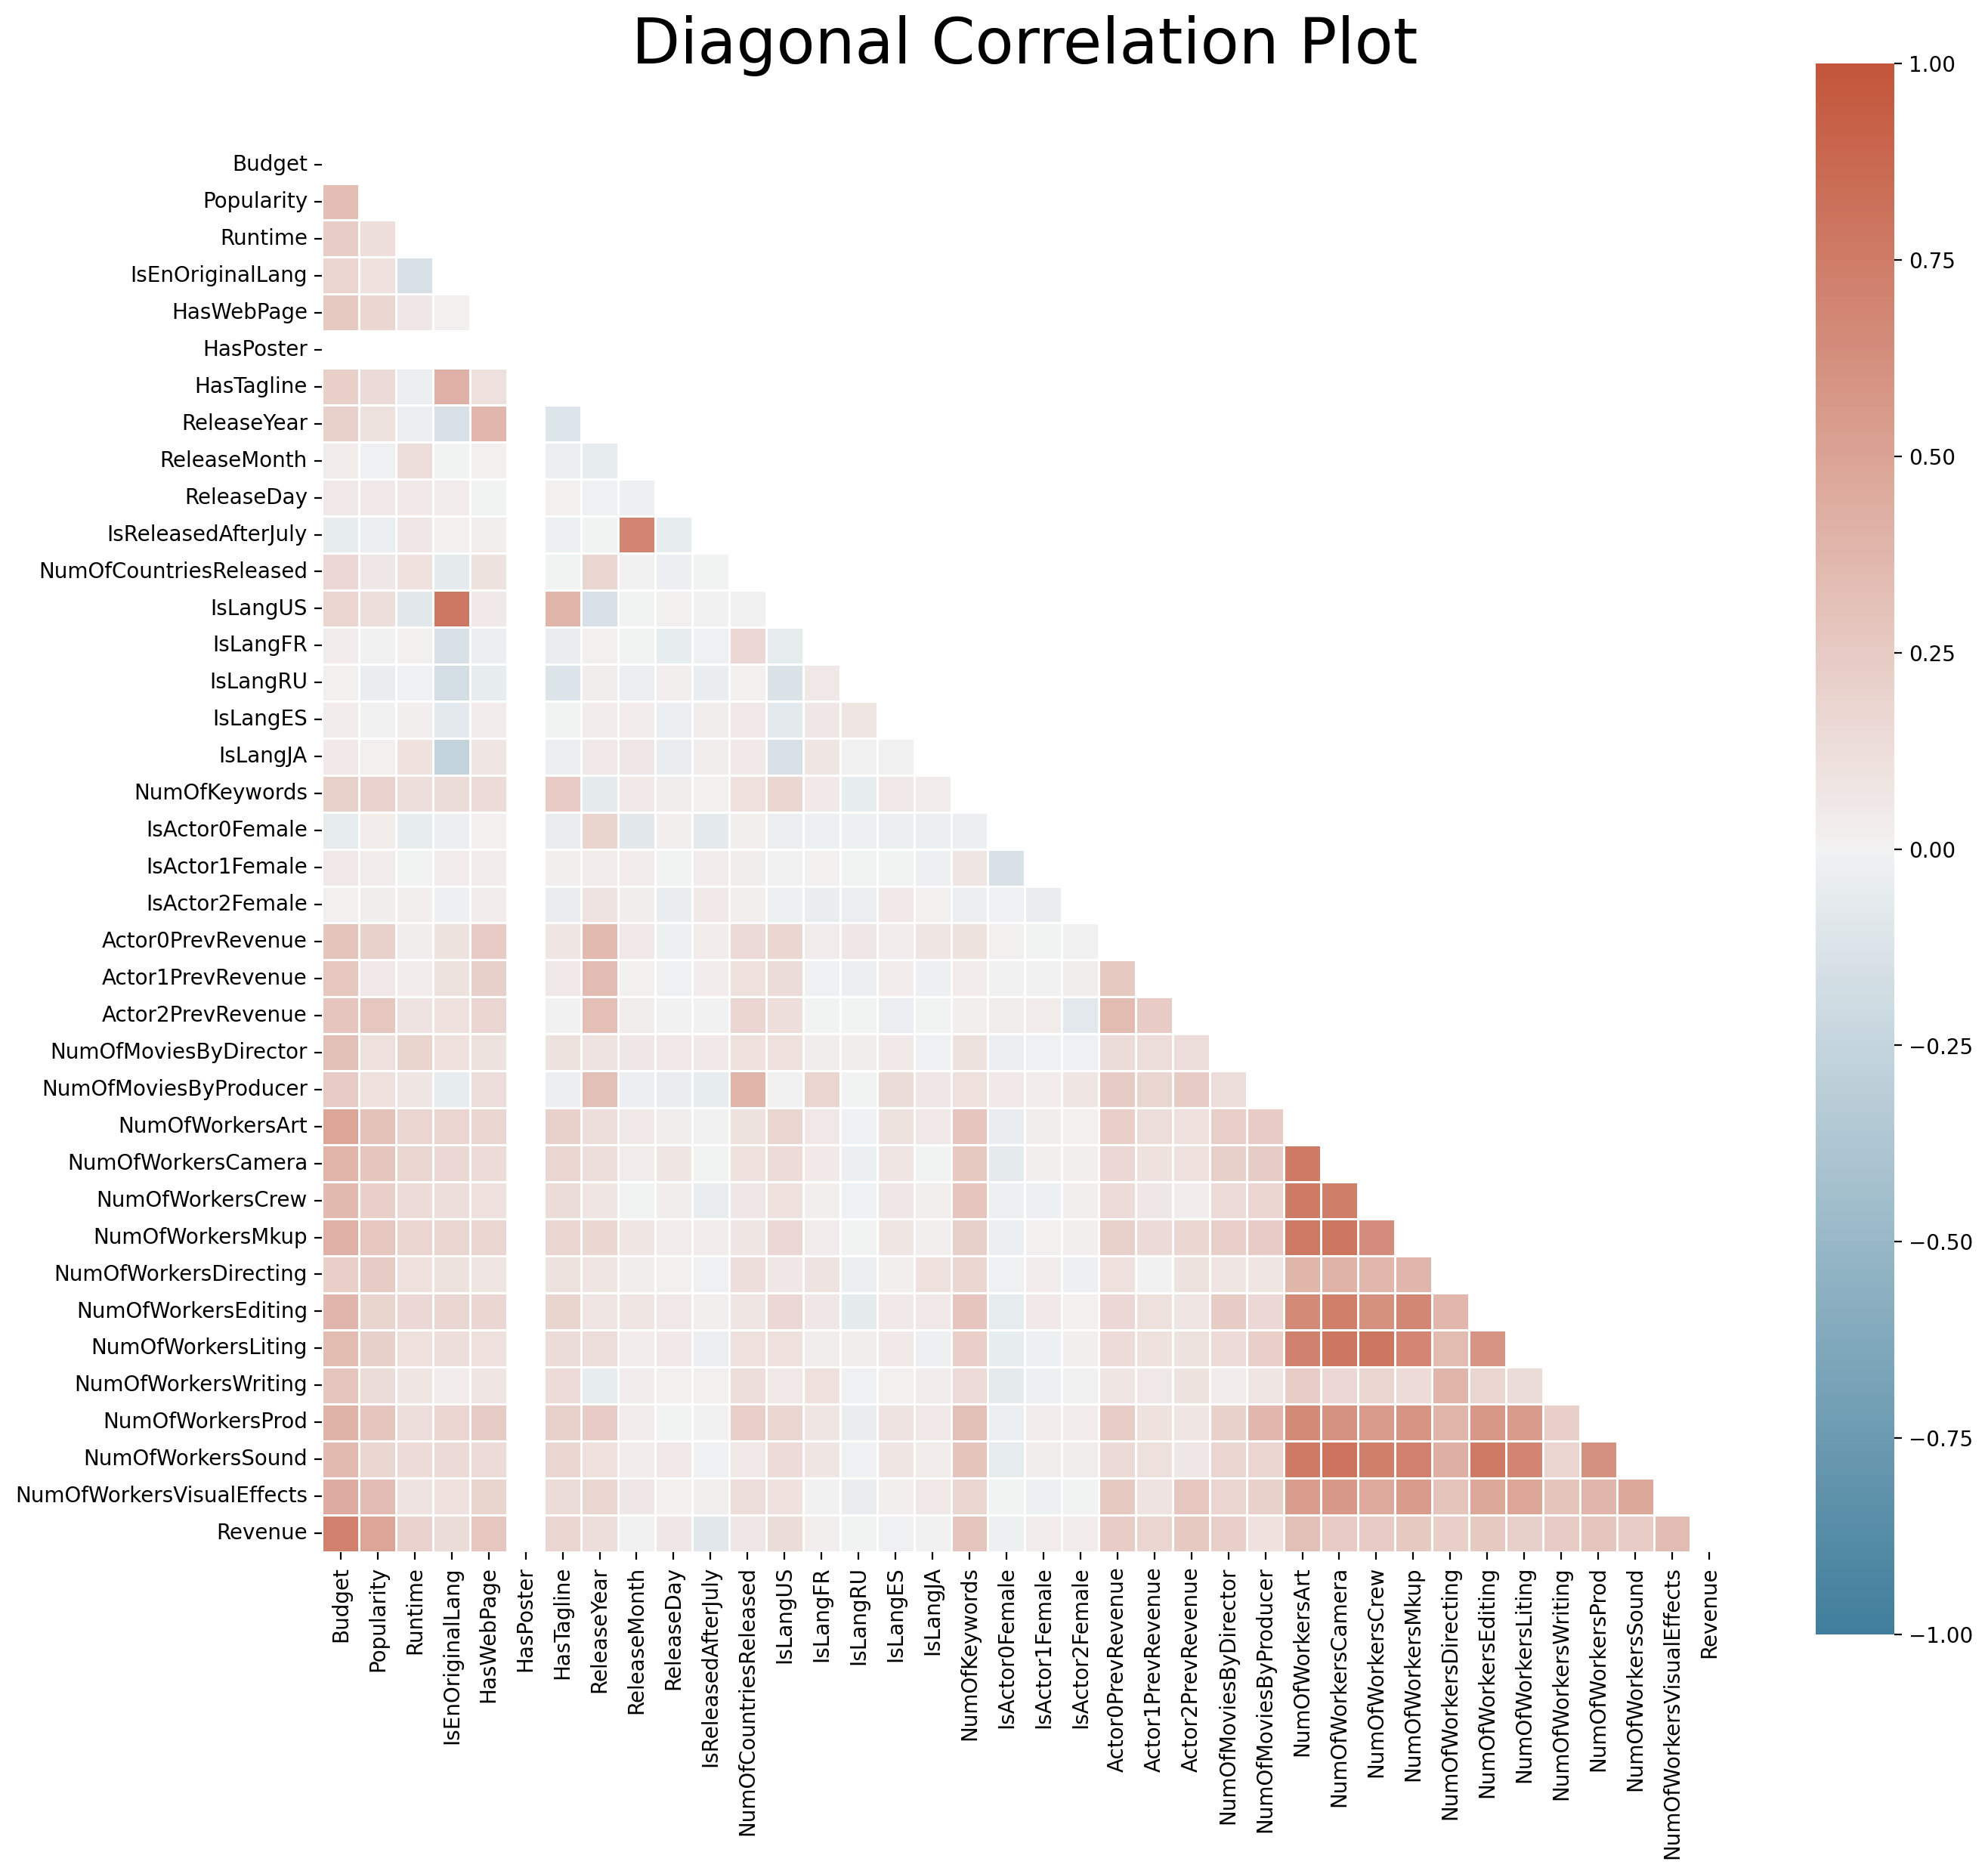

In [5]:
# Compute the correlation matrix with pearson correlation
corr = df.corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 15))                    # Set figure size

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask 
sns.heatmap(corr, 
            mask = mask, 
            cmap = cmap, 
            vmax = 1,                                      # Set scale min value
            vmin = -1,                                     # Set scale min value
            center = 0,                                    # Set scale min value
            square = True,                                 # Ensure perfect squares
            linewidths = 1,                                # Set linewidth between squares
            cbar_kws = {"shrink": .9},                     # Set size of color bar
           );

plt.xticks(rotation=90)                                    # Rotate x labels
plt.yticks()
plt.title('Diagonal Correlation Plot', size=30, y=1.05);   # Set plot title and position